In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
!git pull origin master

From https://github.com/moribello/COVID-19
 * branch              master     -> FETCH_HEAD
Already up to date.


In [49]:
def import_data():
    """Imports data from three different .csv lists. The lists for time_series data is updated automatically via
    GitHub so need to be in those specific directories. The state_population file should be in the same directory
    as this python file"""
    time_series1 = pd.DataFrame(pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
    time_series2 = pd.DataFrame(pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"))
    stpop = pd.DataFrame(pd.read_csv("state_population.csv"))

In [50]:
def tick_dates(time_series):
    """Creates tick labels based on start, end, and in between values by finding the start and end 
    column headers, converting them to date / time, calculating the remaining three quintiles, and converting
    these five values to short month and month date. It depends on the 11th column (index place 12) being in a 
    m/d/yr format."""
    start_date = datetime.strptime(time_series.columns[12], '%m/%d/%y').date()
    tick1 = start_date.strftime("%b %d")
    end_date = datetime.strptime(time_series.columns[-1], '%m/%d/%y').date()
    tick5 = end_date.strftime("%b %d")
    mid_date = start_date + (end_date - start_date)/2
    tick3 = mid_date.strftime("%b %d")
    tick2 = (start_date + (mid_date - start_date)/2).strftime("%b %d")
    tick4 = (mid_date + (end_date - mid_date)/2).strftime("%b %d")
    return (tick1, tick2, tick3, tick4, tick5)

In [51]:
def select_state():
    state = input("Please select a state to analyze: ")
    return state

In [74]:
def select_2states():
    """Prompts the user to select two states for comparison. May not be used if only one state is being analyzed."""
    state1 = input("Please select a state to analyze: ").title()
    state2 = input("Please select a second state to analyze: ").title()
    return state1, state2

In [75]:
def plot_conf_v_death2(time_series1, time_series2):
    """Compares confirmed cases per capita and confirmed deaths per capita for each of the two states selected
    by the select_2states function. The per capita values are derived from 2020 population values that reside in
    the state_population.csv file. If you're running into problems getting those values make sure that the
    state_population.csv file is in the same directory as this file.
    
    tick data on the x axis is created via the tick_dates() function. """
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state1, state2 = select_2states()
    line1 = time_series1[time_series1['Province_State'] == state1].sum().values[12:] / (stpop[stpop['State'] == state1].values[0])[1]
    line2 = time_series2[time_series2['Province_State'] == state1].sum().values[12:] / (stpop[stpop['State'] == state1].values[0])[1]
    line3 = time_series1[time_series1['Province_State'] == state2].sum().values[12:] / (stpop[stpop['State'] == state2].values[0])[1]
    line4 = time_series2[time_series2['Province_State'] == state2].sum().values[12:] / (stpop[stpop['State'] == state2].values[0])[1]
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'skyblue', label = "Confirmed Cases in {}".format(state1))
    plt.plot(line2, color = 'blue', label = "Deaths in {}".format(state1))
    plt.plot(line3, color = 'pink', label = "Confirmed Cases in {}".format(state2))
    plt.plot(line4, color = 'red', label = "Deaths in {}".format(state2))
    plt.grid()
    plt.title("Confirmed COVID-19 Cases vs COVID-19 Deaths in {} and {} \nper Capita".format(state1, state2))
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

In [ ]:
def plot_conf_v_death(time_series1, time_series2):
    """Compares confirmed cases per capita and confirmed deaths per capita the two state selected
    by the select_state function. The per capita values are derived from 2020 population values that reside in
    the state_population.csv file. If you're running into problems getting those values make sure that the
    state_population.csv file is in the same directory as this file.
    
    tick data on the x axis is created via the tick_dates() function. """
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state = select_state()
    line1 = time_series1[time_series1['Province_State'] == state].sum().values[12:]
    line2 = time_series2[time_series2['Province_State'] == state].sum().values[12:]
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'skyblue', label = "Confirmed Cases")
    plt.plot(line2, color = 'red', label = "Deaths")
    plt.grid()
    plt.title("Confirmed COVID-19 Cases vs COVID-19 Deaths in {}".format(state))
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

In [76]:
def main():
    import_data()
    plot_conf_v_death2(time_series1, time_series2)

Please select a state to analyze: illinois
Please select a second state to analyze: massachusetts


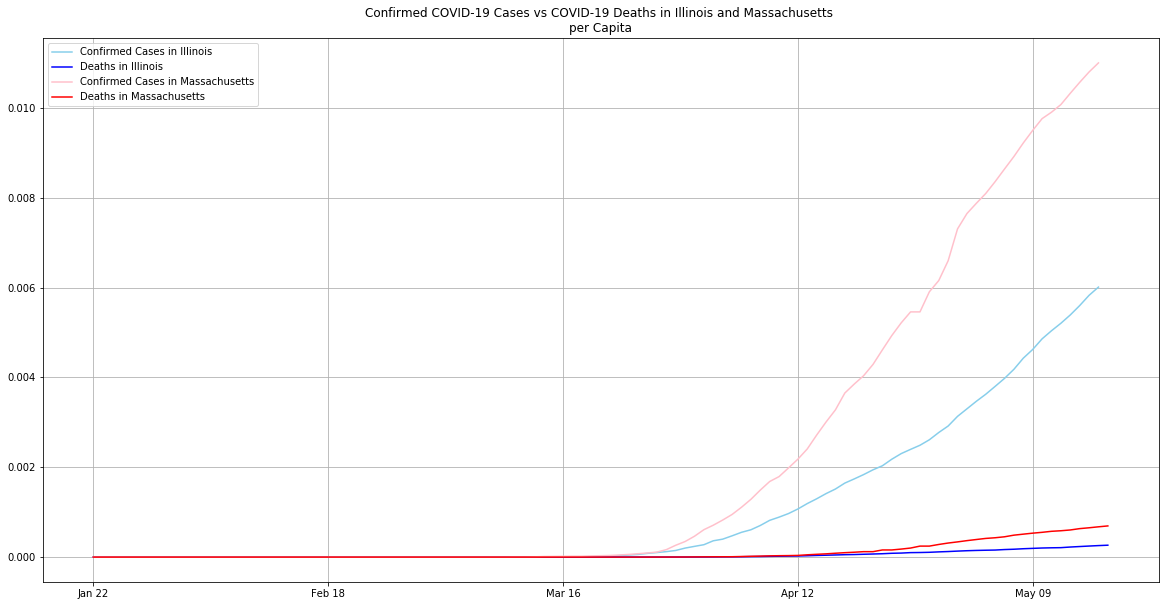

In [79]:
if __name__ == "__main__":
    main()